# Aethalometer Data Analysis
## Sample Analysis Using the Modular Aethalometer System

This notebook demonstrates how to load and analyze aethalometer data using the modular system. We'll be working with a pickle file containing merged cleaned and uncleaned MA350 data.

**Data Source:** `df_uncleaned_Jacros_API_and_OG.pkl`

### Features demonstrated:
- Data loading using the AethalometerPKLLoader
- Basic data inspection and statistics
- Time series visualization
- Source apportionment analysis
- Quality assessment

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Add the src directory to the Python path
src_path = str(Path('../src').resolve())
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import modular system components
try:
    from data.loaders.aethalometer import AethalometerPKLLoader, load_aethalometer_data
    print("✅ Data loaders imported successfully")
except ImportError as e:
    print(f"⚠️ Data loaders import error: {e}")

try:
    from analysis.bc.black_carbon_analyzer import BlackCarbonAnalyzer
    print("✅ Black Carbon analyzer imported successfully")
except ImportError as e:
    print(f"⚠️ Black Carbon analyzer import error: {e}")
    BlackCarbonAnalyzer = None

try:
    from analysis.bc.source_apportionment import SourceApportionmentAnalyzer
    print("✅ Source Apportionment analyzer imported successfully")
except ImportError as e:
    print(f"⚠️ Source Apportionment analyzer import error: {e}")
    SourceApportionmentAnalyzer = None

try:
    from utils.plotting import AethalometerPlotter
    print("✅ Plotting utilities imported successfully")
except ImportError as e:
    print(f"⚠️ Plotting utilities import error: {e}")
    AethalometerPlotter = None

try:
    from config.plotting import setup_plotting_style
    setup_plotting_style()
    print("✅ Plotting style configured successfully")
except ImportError as e:
    print(f"⚠️ Plotting config import error: {e}")
    # Fallback plotting style
    plt.style.use('default')
    sns.set_palette("husl")

try:
    from utils.file_io import ensure_output_directory
    print("✅ File I/O utilities imported successfully")
except ImportError as e:
    print(f"⚠️ File I/O utilities import error: {e}")
    # Create a simple fallback function
    def ensure_output_directory(path):
        os.makedirs(path, exist_ok=True)

# Setup plotting style
plt.rcParams['figure.figsize'] = (12, 6)

print("\n✅ All available libraries imported successfully!")
print("📊 Modular aethalometer analysis system ready!")
print(f"📁 Working directory: {os.getcwd()}")
print(f"🔗 Source path added: {src_path}")

✅ Data loaders imported successfully
✅ Black Carbon analyzer imported successfully
✅ Source Apportionment analyzer imported successfully
✅ Plotting utilities imported successfully
✅ Plotting style configured successfully
✅ File I/O utilities imported successfully

✅ All available libraries imported successfully!
📊 Modular aethalometer analysis system ready!
📁 Working directory: /Users/ahzs645/Github/aethmodular/notebooks
🔗 Source path added: /Users/ahzs645/Github/aethmodular/src


## 1. Load the Pickle DataFrame

We'll load the aethalometer data from the specified pickle file using both direct pandas loading and the modular system's AethalometerPKLLoader.

In [2]:
# Define the data file path
data_path = "/Users/ahzs645/Library/CloudStorage/GoogleDrive-ahzs645@gmail.com/My Drive/University/Research/Grad/UC Davis Ann/NASA MAIA/Data/Aethelometry Data/Kyan Data/Mergedcleaned and uncleaned MA350 data20250707030704/df_uncleaned_Jacros_API_and_OG.pkl"

print(f"📁 Loading data from: {Path(data_path).name}")
print(f"📍 Full path: {data_path}")

# Method 1: Direct pandas loading
try:
    df_direct = pd.read_pickle(data_path)
    print(f"✅ Successfully loaded with pandas: {len(df_direct)} rows")
except Exception as e:
    print(f"❌ Error loading with pandas: {e}")
    df_direct = None

# Method 2: Using the modular system's AethalometerPKLLoader
try:
    loader = AethalometerPKLLoader(data_path, format_type="auto")
    
    # Get data summary
    summary = loader.get_data_summary()
    print(f"\n📊 Data Summary from AethalometerPKLLoader:")
    for key, value in summary.items():
        if key != 'columns':
            print(f"   {key}: {value}")
    
    # Load the data
    df_modular = loader.load(convert_to_jpl=False)
    print(f"✅ Successfully loaded with modular system: {len(df_modular)} rows")
    
except Exception as e:
    print(f"❌ Error loading with modular system: {e}")
    df_modular = None

# Use whichever method worked
df = df_direct if df_direct is not None else df_modular

if df is not None:
    print(f"\n🎯 Working with DataFrame: {len(df)} rows × {len(df.columns)} columns")
else:
    print("\n❌ Failed to load data with both methods")

📁 Loading data from: df_uncleaned_Jacros_API_and_OG.pkl
📍 Full path: /Users/ahzs645/Library/CloudStorage/GoogleDrive-ahzs645@gmail.com/My Drive/University/Research/Grad/UC Davis Ann/NASA MAIA/Data/Aethelometry Data/Kyan Data/Mergedcleaned and uncleaned MA350 data20250707030704/df_uncleaned_Jacros_API_and_OG.pkl
✅ Successfully loaded with pandas: 1665156 rows
Detected format: standard

📊 Data Summary from AethalometerPKLLoader:
   total_samples: 1665156
   format_type: standard
   file_path: /Users/ahzs645/Library/CloudStorage/GoogleDrive-ahzs645@gmail.com/My Drive/University/Research/Grad/UC Davis Ann/NASA MAIA/Data/Aethelometry Data/Kyan Data/Mergedcleaned and uncleaned MA350 data20250707030704/df_uncleaned_Jacros_API_and_OG.pkl
   earliest_date: 2021-01-09 16:38:00
   latest_date: 2025-06-26 23:18:00
   datetime_column: datetime_local
   bc_data_availability: {'Blue BC1': np.int64(1593671), 'Blue BCc': np.int64(1593671), 'Green BC1': np.int64(1593671), 'Green BCc': np.int64(1593671),

## 2. Display DataFrame Information

Let's examine the structure of our data, including column names, data types, and memory usage.

In [3]:
if df is not None:
    print("📊 DATAFRAME INFORMATION")
    print("=" * 50)
    
    # Basic info
    print(f"Shape: {df.shape}")
    print(f"Index type: {type(df.index).__name__}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Display DataFrame info
    print("\n🔍 DataFrame Info:")
    df.info()
    
    # Check for datetime columns
    print(f"\n📅 Index range:")
    if hasattr(df.index, 'min') and hasattr(df.index, 'max'):
        try:
            print(f"   From: {df.index.min()}")
            print(f"   To: {df.index.max()}")
            print(f"   Duration: {df.index.max() - df.index.min()}")
        except:
            print(f"   Index range: {df.index[0]} to {df.index[-1]}")
    
    # Column overview
    print(f"\n📋 Column Categories:")
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper()]
    atn_cols = [col for col in df.columns if 'ATN' in str(col).upper()]
    flow_cols = [col for col in df.columns if 'flow' in str(col).lower()]
    
    print(f"   Black Carbon columns: {len(bc_cols)}")
    print(f"   Attenuation columns: {len(atn_cols)}")
    print(f"   Flow columns: {len(flow_cols)}")
    print(f"   Other columns: {len(df.columns) - len(bc_cols) - len(atn_cols) - len(flow_cols)}")
    
else:
    print("❌ No data available to display information")

📊 DATAFRAME INFORMATION
Shape: (1665156, 239)
Index type: RangeIndex
Memory usage: 7538.33 MB

🔍 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665156 entries, 0 to 1665155
Columns: 239 entries, datetime_local to GPS speed (km/h)
dtypes: datetime64[ns](1), float64(208), int64(2), object(28)
memory usage: 3.0+ GB

📅 Index range:
   From: 0
   To: 1665155
   Duration: 1665155

📋 Column Categories:
   Black Carbon columns: 30
   Attenuation columns: 25
   Flow columns: 8
   Other columns: 176


## 3. Preview DataFrame Contents

Let's look at the first and last few rows to understand the data structure.

In [4]:
if df is not None:
    print("🔍 FIRST 5 ROWS")
    print("=" * 50)
    display(df.head())
    
    print(f"\n🔍 LAST 5 ROWS")
    print("=" * 50)
    display(df.tail())
    
    # Show key columns if they exist
    key_columns = []
    for col_pattern in ['BC', 'ATN', 'flow', 'AAE', 'Delta']:
        matching_cols = [col for col in df.columns if col_pattern.lower() in str(col).lower()]
        key_columns.extend(matching_cols[:3])  # Limit to first 3 matches per pattern
    
    if key_columns:
        print(f"\n🎯 KEY COLUMNS PREVIEW ({len(key_columns)} columns)")
        print("=" * 50)
        display(df[key_columns].head())
    
    # Check for any obvious data quality issues
    print(f"\n🔍 QUICK DATA QUALITY CHECK")
    print("=" * 50)
    print(f"Total missing values: {df.isnull().sum().sum()}")
    print(f"Duplicate rows: {df.duplicated().sum()}")
    
    # Check for negative values in BC columns (shouldn't happen)
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
    if bc_cols:
        negative_counts = (df[bc_cols] < 0).sum()
        if negative_counts.any():
            print(f"Negative BC values found: {negative_counts[negative_counts > 0].to_dict()}")
        else:
            print("✅ No negative BC values found")
            
else:
    print("❌ No data available to preview")

🔍 FIRST 5 ROWS


,datetime_local,index,Unnamed: 0,Accel X,Accel Y,Accel Z,Blue ATN1,Blue ATN2,Blue BC1,Blue BC2,...,transfer,transferProtocol,unixtime,updated,viaBacklog,source,App version,Battery remaining (%),Data format version,GPS speed (km/h)
0,2021-01-09 16:38:00,910527,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.610210e+12,mqtt,1.610210e+12,1.676347e+12,NaN,api,NaN,NaN,NaN,NaN
1,2021-01-09 16:39:00,910533,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.610210e+12,mqtt,1.610210e+12,1.676347e+12,NaN,api,NaN,NaN,NaN,NaN
2,2021-01-09 16:40:00,910534,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.610210e+12,mqtt,1.610210e+12,1.676347e+12,NaN,api,NaN,NaN,NaN,NaN
3,2021-01-09 16:41:00,910538,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.610210e+12,mqtt,1.610210e+12,1.676347e+12,NaN,api,NaN,NaN,NaN,NaN
4,2021-01-09 16:42:00,910539,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.610211e+12,mqtt,1.610210e+12,1.676347e+12,NaN,api,NaN,NaN,NaN,NaN



🔍 LAST 5 ROWS


,datetime_local,index,Unnamed: 0,Accel X,Accel Y,Accel Z,Blue ATN1,Blue ATN2,Blue BC1,Blue BC2,...,transfer,transferProtocol,unixtime,updated,viaBacklog,source,App version,Battery remaining (%),Data format version,GPS speed (km/h)
1665151,2025-06-26 23:14:00,1201640,36809,-25742.0,-82.0,-1189.0,66.3313,56.6185,1479.0,1830.0,...,1.750980e+12,mqtt,1.750980e+12,NaN,NaN,api,NaN,NaN,NaN,NaN
1665152,2025-06-26 23:15:00,1201641,36810,-25755.0,-62.0,-1159.0,66.3612,56.6468,1979.0,2367.0,...,1.750980e+12,mqtt,1.750980e+12,NaN,NaN,api,NaN,NaN,NaN,NaN
1665153,2025-06-26 23:16:00,1201642,36811,-25751.0,-64.0,-1194.0,66.3805,56.6656,1269.0,1610.0,...,1.750980e+12,mqtt,1.750980e+12,NaN,NaN,api,NaN,NaN,NaN,NaN
1665154,2025-06-26 23:17:00,1201643,36812,-25740.0,-83.0,-1194.0,66.4039,56.6888,1550.0,1947.0,...,1.750980e+12,mqtt,1.750980e+12,NaN,NaN,api,NaN,NaN,NaN,NaN
1665155,2025-06-26 23:18:00,1201644,36813,-25765.0,-76.0,-1192.0,66.428,56.7131,1594.0,2027.0,...,1.750980e+12,mqtt,1.750980e+12,NaN,NaN,api,NaN,NaN,NaN,NaN



🎯 KEY COLUMNS PREVIEW (12 columns)


,Blue BC1,Blue BC2,Blue BCc,Blue ATN1,Blue ATN2,Green ATN1,Flow setpoint (mL/min),Flow total (mL/min),Flow1 (mL/min),deltaC1,deltaC2,deltaCc
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN



🔍 QUICK DATA QUALITY CHECK
Total missing values: 179709661
Duplicate rows: 0
Negative BC values found: {'Blue BCc': 56803, 'Green BCc': 57213, 'IR BCc': 67488, 'Red BCc': 57159, 'UV BCc': 65226, 'ma.wavelengths.iblue.bc.b1': 25, 'ma.wavelengths.iblue.bc.b2': 30, 'ma.wavelengths.iblue.bc.bc': 121, 'ma.wavelengths.igreen.bc.b1': 27, 'ma.wavelengths.igreen.bc.b2': 34, 'ma.wavelengths.igreen.bc.bc': 144, 'ma.wavelengths.iir.bc.b1': 18, 'ma.wavelengths.iir.bc.b2': 11, 'ma.wavelengths.iir.bc.bc': 142, 'ma.wavelengths.ired.bc.b1': 10, 'ma.wavelengths.ired.bc.b2': 10, 'ma.wavelengths.ired.bc.bc': 115, 'ma.wavelengths.iuv.bc.b1': 10, 'ma.wavelengths.iuv.bc.b2': 27, 'ma.wavelengths.iuv.bc.bc': 157}


## 4. Basic DataFrame Statistics

Let's examine the statistical properties of our data.

In [5]:
if df is not None:
    print("📈 BASIC STATISTICS")
    print("=" * 50)
    
    # Overall statistics
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"Numeric columns: {len(numeric_cols)}")
    
    # General statistics
    stats = df.describe()
    display(stats)
    
    # Focus on BC columns if they exist
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
    if bc_cols:
        print(f"\n🎯 BLACK CARBON STATISTICS ({len(bc_cols)} columns)")
        print("=" * 50)
        bc_stats = df[bc_cols].describe()
        display(bc_stats)
        
        # Additional BC-specific stats
        print(f"\n📊 BC Summary:")
        for col in bc_cols[:5]:  # Show first 5 BC columns
            if col in df.columns:
                mean_val = df[col].mean()
                std_val = df[col].std()
                print(f"   {col}: {mean_val:.3f} ± {std_val:.3f}")
    
    # Check for correlations between key variables
    if len(bc_cols) >= 2:
        print(f"\n🔗 BC CORRELATIONS (top correlations)")
        print("=" * 50)
        bc_corr = df[bc_cols].corr()
        
        # Get upper triangle of correlation matrix
        mask = np.triu(np.ones_like(bc_corr, dtype=bool))
        bc_corr_masked = bc_corr.mask(mask)
        
        # Find highest correlations
        corr_pairs = []
        for col in bc_corr_masked.columns:
            for idx in bc_corr_masked.index:
                if not pd.isna(bc_corr_masked.loc[idx, col]):
                    corr_pairs.append((idx, col, bc_corr_masked.loc[idx, col]))
        
        # Sort by correlation strength
        corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        
        for i, (var1, var2, corr) in enumerate(corr_pairs[:5]):
            print(f"   {var1} vs {var2}: {corr:.3f}")
    
else:
    print("❌ No data available for statistics")

📈 BASIC STATISTICS
Numeric columns: 210


/opt/miniconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,datetime_local,index,Unnamed: 0,Accel X,Accel Y,Accel Z,Blue ATN2,Blue BC1,Blue BC2,Blue BCc,...,scd.co2,statusId,timezoneOffset,transfer,unixtime,updated,App version,Battery remaining (%),Data format version,GPS speed (km/h)
count,1665156,1.665156e+06,1.665156e+06,1.627062e+06,1.627062e+06,1.627062e+06,1.594024e+06,1.593671e+06,1.593671e+06,1.593671e+06,...,6758.000000,959575.000000,1417789.0,1.417789e+06,1.417789e+06,4.486020e+05,2.473670e+05,247367.000000,247367.0,247367.0
mean,2023-10-29 00:22:08.030563072,8.152333e+05,2.163285e+05,-2.484344e+04,7.223335e+00,-1.499699e+03,4.617807e+01,4.006365e+03,4.435956e+03,8.106670e+03,...,460.221592,7242.236441,0.0,1.701564e+12,1.701563e+12,1.676815e+12,1.400000e+00,99.963245,1.0,0.0
min,2021-01-09 16:38:00,0.000000e+00,0.000000e+00,-2.582500e+04,-1.880000e+02,-2.372500e+04,-2.651000e-01,-4.051440e+06,-4.340906e+06,-2.343295e+08,...,390.773300,1.000000,0.0,1.610210e+12,1.610210e+12,1.676347e+12,1.400000e+00,82.000000,1.0,0.0
25%,2023-01-12 23:41:45,3.903178e+05,1.177700e+04,-2.572200e+04,-1.800000e+01,-1.678000e+03,2.956150e+01,1.310000e+03,1.491000e+03,2.715000e+03,...,416.050975,3752.000000,0.0,1.671385e+12,1.671385e+12,1.676598e+12,1.400000e+00,100.000000,1.0,0.0
50%,2023-11-06 11:09:30,8.005315e+05,2.411800e+04,-2.570600e+04,3.000000e+00,-1.534000e+03,4.944546e+01,2.427000e+03,2.753000e+03,5.213000e+03,...,458.506750,7276.000000,0.0,1.706913e+12,1.706913e+12,1.676807e+12,1.400000e+00,100.000000,1.0,0.0
75%,2024-08-30 20:07:15,1.221963e+06,3.701700e+04,-2.568500e+04,3.300000e+01,-1.389000e+03,6.467250e+01,4.665000e+03,5.212000e+03,9.705000e+03,...,486.533650,10838.000000,0.0,1.729200e+12,1.729200e+12,1.677031e+12,1.400000e+00,100.000000,1.0,0.0
max,2025-06-26 23:18:00,1.748893e+06,1.748893e+06,4.600000e+01,1.140300e+04,0.000000e+00,8.827290e+01,5.186487e+06,5.954762e+07,3.520764e+08,...,690.704700,14120.000000,0.0,1.750980e+12,1.750980e+12,1.697423e+12,1.400000e+00,100.000000,1.0,0.0
std,NaN,4.864397e+05,5.046921e+05,4.624221e+03,4.057429e+01,3.413426e+02,2.179533e+01,1.149150e+04,4.822661e+04,5.909516e+05,...,49.729702,4077.826503,0.0,3.306434e+10,3.306414e+10,3.345556e+08,6.661352e-16,0.595727,0.0,0.0



🎯 BLACK CARBON STATISTICS (20 columns)


,Blue BCc,Green BCc,IR BCc,Red BCc,UV BCc,ma.wavelengths.iblue.bc.b1,ma.wavelengths.iblue.bc.b2,ma.wavelengths.iblue.bc.bc,ma.wavelengths.igreen.bc.b1,ma.wavelengths.igreen.bc.b2,ma.wavelengths.igreen.bc.bc,ma.wavelengths.iir.bc.b1,ma.wavelengths.iir.bc.b2,ma.wavelengths.iir.bc.bc,ma.wavelengths.ired.bc.b1,ma.wavelengths.ired.bc.b2,ma.wavelengths.ired.bc.bc,ma.wavelengths.iuv.bc.b1,ma.wavelengths.iuv.bc.b2,ma.wavelengths.iuv.bc.bc
count,1.593671e+06,1.593671e+06,1.593671e+06,1.593671e+06,1.593671e+06,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,8.106670e+03,8.945154e+03,7.677271e+03,6.312810e+03,6.809529e+03,1270.694935,1259.073027,1406.416961,1288.314488,1274.559482,1400.444052,1478.399293,1446.414605,1666.365135,1350.656066,1329.856302,1411.452297,1204.332155,1187.147232,1313.514723
std,5.909516e+05,9.501474e+05,6.812424e+05,1.660842e+06,1.321742e+06,7982.904386,6981.380568,6045.436846,7837.722946,6850.634017,5953.114076,8065.810345,6946.842616,8989.954786,7868.334314,6861.470584,5882.810063,7739.092982,6705.277732,5646.478037
min,-2.343295e+08,-1.769038e+08,-5.106672e+08,-1.490630e+09,-1.352940e+09,-396.000000,-497.000000,-2438.000000,-311.000000,-486.000000,-2493.000000,-380.000000,-164.000000,-2080.000000,-343.000000,-182.000000,-2686.000000,-254.000000,-439.000000,-2837.000000
25%,2.715000e+03,2.647000e+03,2.663000e+03,2.616000e+03,2.611000e+03,378.000000,408.000000,315.000000,389.000000,404.000000,350.000000,518.000000,532.000000,313.000000,430.000000,449.000000,311.000000,316.000000,330.000000,188.000000
50%,5.213000e+03,5.096000e+03,5.225000e+03,5.058000e+03,5.005000e+03,591.000000,621.000000,943.000000,634.000000,676.000000,973.000000,785.000000,837.000000,1112.000000,661.000000,690.000000,954.000000,509.000000,550.000000,885.000000
75%,9.705000e+03,9.483000e+03,9.682000e+03,9.422000e+03,9.159000e+03,947.000000,1034.000000,1687.000000,999.000000,1069.000000,1711.000000,1265.000000,1299.000000,1993.000000,1113.000000,1161.000000,1692.000000,812.000000,905.000000,1698.000000
max,3.520764e+08,7.915784e+08,1.956078e+08,3.292518e+08,3.874069e+08,218525.000000,179585.000000,150145.000000,214267.000000,175716.000000,148073.000000,219513.000000,177409.000000,219513.000000,214609.000000,175524.000000,146443.000000,211396.000000,171958.000000,140066.000000



📊 BC Summary:
   Blue BCc: 8106.670 ± 590951.550
   Green BCc: 8945.154 ± 950147.411
   IR BCc: 7677.271 ± 681242.368
   Red BCc: 6312.810 ± 1660842.383
   UV BCc: 6809.529 ± 1321742.439

🔗 BC CORRELATIONS (top correlations)
   ma.wavelengths.iuv.bc.b1 vs ma.wavelengths.iblue.bc.b1: 0.999
   ma.wavelengths.igreen.bc.b1 vs ma.wavelengths.iblue.bc.b1: 0.999
   ma.wavelengths.ired.bc.b1 vs ma.wavelengths.iblue.bc.b1: 0.999
   ma.wavelengths.ired.bc.b1 vs ma.wavelengths.igreen.bc.b1: 0.999
   ma.wavelengths.ired.bc.b1 vs ma.wavelengths.iir.bc.b1: 0.999


## 5. Time Series Visualization

Let's create some basic visualizations using the modular system's plotting capabilities.

📈 CREATING TIME SERIES VISUALIZATIONS
Available BC columns: ['Blue BCc', 'Green BCc', 'IR BCc', 'Red BCc', 'UV BCc']
Rows with BC data: 1594520
✅ Successfully set datetime_local as index
   Date range: 2021-01-31 19:46:00 to 2021-02-02 10:17:00

🎯 Using modular plotting system...
Plotting columns: ['Blue BCc', 'Green BCc', 'IR BCc', 'Red BCc', 'UV BCc']
✅ Successfully set datetime_local as index
   Date range: 2021-01-31 19:46:00 to 2021-02-02 10:17:00

🎯 Using modular plotting system...
Plotting columns: ['Blue BCc', 'Green BCc', 'IR BCc', 'Red BCc', 'UV BCc']


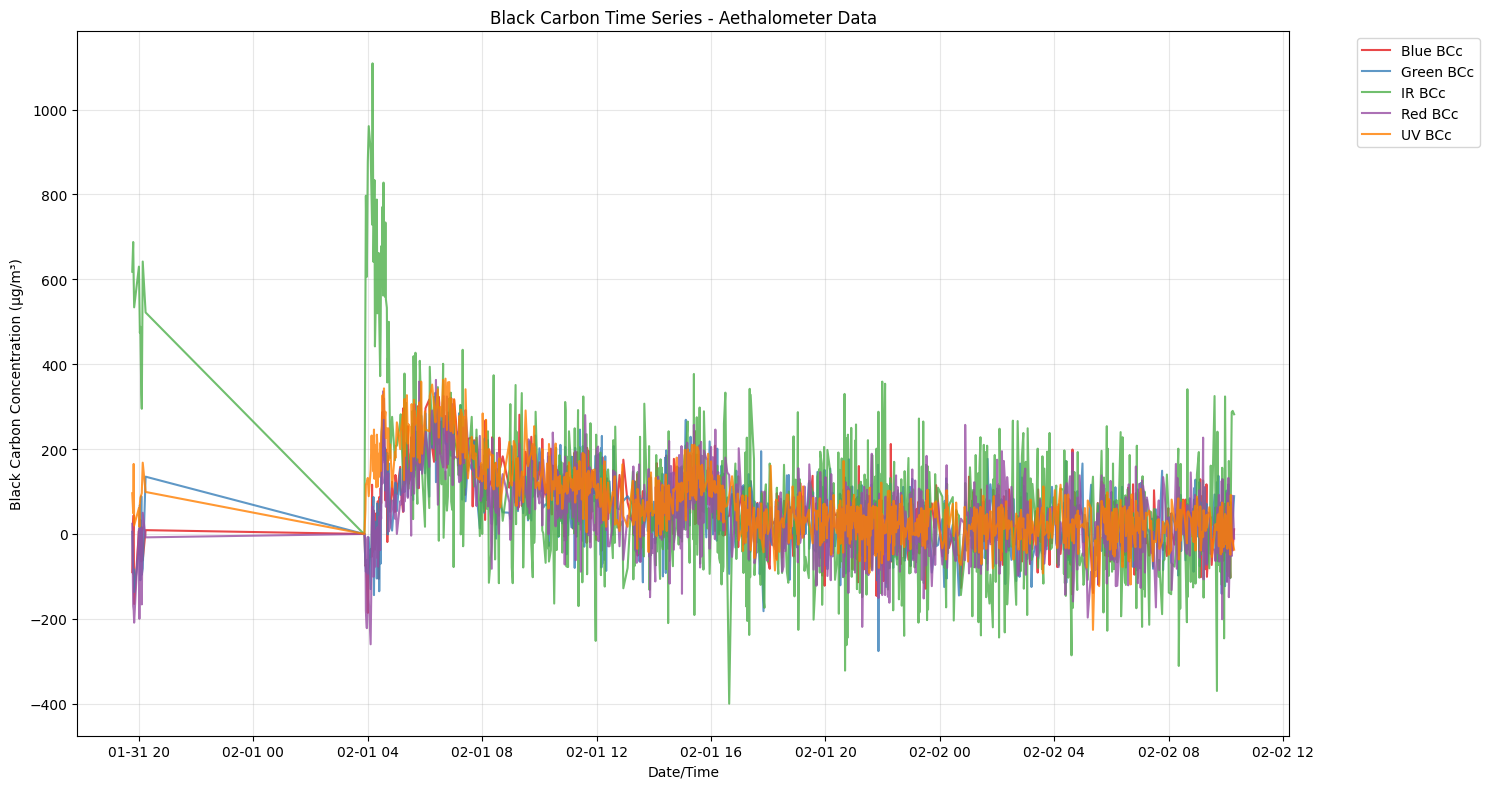

✅ Modular plotting successful!


In [20]:
if df is not None:
    print("📈 CREATING TIME SERIES VISUALIZATIONS")
    print("=" * 50)
    
    # Find BC columns for plotting
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
    print(f"Available BC columns: {bc_cols[:5]}")
    
    # Find rows with actual BC data (not all NaN)
    if bc_cols:
        non_nan_mask = df[bc_cols].notna().any(axis=1)
        available_data_count = non_nan_mask.sum()
        print(f"Rows with BC data: {available_data_count}")
        
        if available_data_count > 0:
            # Get a representative sample of the data
            sample_indices = df[non_nan_mask].index[:1000]  # First 1000 rows with data
            plot_df = df.loc[sample_indices].copy()
            
            # Fix datetime conversion - use the actual datetime column
            datetime_success = False
            if 'datetime_local' in plot_df.columns:
                try:
                    # Use the datetime_local column as the index
                    plot_df = plot_df.set_index('datetime_local')
                    datetime_success = True
                    print("✅ Successfully set datetime_local as index")
                    print(f"   Date range: {plot_df.index.min()} to {plot_df.index.max()}")
                except Exception as e:
                    print(f"⚠️ Could not set datetime_local as index: {e}")
            elif 'datetime' in plot_df.columns:
                try:
                    plot_df = plot_df.set_index('datetime')
                    datetime_success = True
                    print("✅ Successfully set datetime as index")
                except Exception as e:
                    print(f"⚠️ Could not set datetime as index: {e}")
            else:
                # Check for other timestamp columns
                time_cols = [col for col in plot_df.columns if 'time' in col.lower() or 'date' in col.lower()]
                if time_cols:
                    try:
                        time_col = time_cols[0]  # Use first timestamp column found
                        plot_df = plot_df.set_index(time_col)
                        datetime_success = True
                        print(f"✅ Successfully set {time_col} as index")
                    except Exception as e:
                        print(f"⚠️ Could not set {time_col} as index: {e}")
                else:
                    print("⚠️ No suitable datetime columns found")
            
            # Try the modular plotting system
            modular_success = False
            if datetime_success and isinstance(plot_df.index, pd.DatetimeIndex):
                try:
                    print(f"\n🎯 Using modular plotting system...")
                    
                    # Initialize plotter with safe settings
                    plotter = AethalometerPlotter(style='default', figsize=(15, 8))
                    
                    # Select valid columns with actual data
                    valid_cols = []
                    for col in bc_cols[:5]:  # Limit to first 5 columns
                        if col in plot_df.columns and plot_df[col].notna().any():
                            valid_cols.append(col)
                    
                    if valid_cols:
                        print(f"Plotting columns: {valid_cols}")
                        
                        # Plot time series
                        fig = plotter.plot_time_series(
                            plot_df[valid_cols], 
                            columns=valid_cols,
                            title="Black Carbon Time Series - Aethalometer Data"
                        )
                        plt.tight_layout()
                        plt.show()
                        modular_success = True
                        print("✅ Modular plotting successful!")
                    
                except Exception as e:
                    print(f"⚠️ Modular plotting failed: {e}")
                    modular_success = False
            
            # Fallback to basic matplotlib if modular system fails
            if not modular_success:
                print(f"\n📊 Using fallback matplotlib plotting...")
                
                try:
                    # Create basic plots
                    valid_bc_cols = [col for col in bc_cols[:4] if col in plot_df.columns and plot_df[col].notna().any()]
                    
                    if valid_bc_cols:
                        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
                        axes = axes.flatten()
                        
                        for i, col in enumerate(valid_bc_cols):
                            if i < 4:
                                # Clean the data before plotting
                                clean_data = pd.to_numeric(plot_df[col], errors='coerce')
                                axes[i].plot(plot_df.index, clean_data, alpha=0.7)
                                axes[i].set_title(f'{col}')
                                axes[i].set_ylabel('Concentration (μg/m³)')
                                axes[i].grid(True, alpha=0.3)
                                
                                if datetime_success:
                                    axes[i].tick_params(axis='x', rotation=45)
                        
                        # Hide empty subplots
                        for i in range(len(valid_bc_cols), 4):
                            axes[i].set_visible(False)
                        
                        plt.suptitle('Black Carbon Time Series - Fallback Plots', fontsize=16)
                        plt.tight_layout()
                        plt.show()
                        print("✅ Fallback plotting successful!")
                    else:
                        print("❌ No valid BC columns found for plotting")
                        
                except Exception as e:
                    print(f"❌ Fallback plotting also failed: {e}")
        else:
            print("❌ No BC data available for plotting")
    else:
        print("❌ No BC columns found in dataset")
else:
    print("❌ No data available for visualization")

## 6. Advanced Analysis with Modular System

Now let's demonstrate some of the advanced analysis capabilities of the modular system.

In [7]:
if df is not None:
    print("🔬 ADVANCED ANALYSIS USING MODULAR SYSTEM")
    print("=" * 50)
    
    try:
        # Source Apportionment Analysis
        print("1. Source Apportionment Analysis...")
        
        if SourceApportionmentAnalyzer is not None:
            try:
                analyzer = SourceApportionmentAnalyzer()
                results = analyzer.analyze(df)
                
                if 'error' not in results:
                    print(f"   ✅ Source apportionment completed")
                    print(f"   📊 Analysis results: {results.get('summary', 'No summary available')}")
                    
                    # Display detailed results
                    if 'source_contributions' in results:
                        contrib = results['source_contributions']
                        print(f"   🔥 Biomass burning: {contrib['biomass_fraction']['mean']*100:.1f}% ± {contrib['biomass_fraction']['std']*100:.1f}%")
                        print(f"   ⛽ Fossil fuel: {contrib['fossil_fraction']['mean']*100:.1f}% ± {contrib['fossil_fraction']['std']*100:.1f}%")
                    
                    if 'aae_statistics' in results:
                        aae = results['aae_statistics']
                        print(f"   📈 AAE: {aae['mean']:.2f} ± {aae['std']:.2f}")
                        
                else:
                    print(f"   ⚠️ Source apportionment failed: {results['error']}")
                    
            except Exception as e:
                print(f"   ⚠️ Source apportionment analysis error: {e}")
        else:
            print(f"   ⚠️ SourceApportionmentAnalyzer not available")
    
    except Exception as e:
        print(f"⚠️ Error in source apportionment analysis: {e}")
    
    try:
        # Black Carbon analysis with available analyzer
        print("\n2. Black Carbon Analysis...")
        
        # Check if we have the required columns for BC analysis
        bc_columns = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
        
        if BlackCarbonAnalyzer is not None and len(bc_columns) >= 1:
            try:
                bc_analyzer = BlackCarbonAnalyzer()
                print(f"   ✅ BlackCarbonAnalyzer initialized")
                print(f"   📊 Available BC columns: {bc_columns[:5]}")  # Show first 5
                
                # Basic BC statistics
                print(f"   📈 Basic BC Statistics:")
                for col in bc_columns[:3]:  # Analyze first 3 BC columns
                    if col in df.columns:
                        mean_val = df[col].mean()
                        std_val = df[col].std()
                        median_val = df[col].median()
                        print(f"      {col}: mean={mean_val:.3f}, std={std_val:.3f}, median={median_val:.3f}")
                        
            except Exception as e:
                print(f"   ⚠️ Black carbon analysis failed: {e}")
                
        else:
            print(f"   ⚠️ BlackCarbonAnalyzer not available or insufficient BC columns")
            print(f"   Available BC columns: {bc_columns}")
    
    except Exception as e:
        print(f"⚠️ Error in black carbon analysis: {e}")
    
    print(f"\n3. Data Quality Assessment...")
    
    # Basic data quality checks
    quality_issues = []
    
    # Check for missing data
    missing_pct = (df.isnull().sum() / len(df) * 100)
    high_missing = missing_pct[missing_pct > 10]
    if not high_missing.empty:
        quality_issues.append(f"High missing data in {len(high_missing)} columns")
    
    # Check for outliers in BC data
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
    if bc_cols:
        for col in bc_cols[:3]:  # Check first 3 BC columns
            if col in df.columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
                if len(outliers) > len(df) * 0.05:  # More than 5% outliers
                    quality_issues.append(f"High outlier rate in {col}: {len(outliers)/len(df)*100:.1f}%")
    
    if quality_issues:
        print("   ⚠️ Quality issues found:")
        for issue in quality_issues:
            print(f"      - {issue}")
    else:
        print("   ✅ No major quality issues detected")
    
    print(f"\n4. Correlation Analysis...")
    
    # Correlation analysis for BC columns
    if len(bc_cols) >= 2:
        print("   📊 BC Correlations:")
        bc_corr = df[bc_cols].corr()
        
        # Show strongest correlations
        mask = np.triu(np.ones_like(bc_corr, dtype=bool))
        bc_corr_masked = bc_corr.mask(mask)
        
        corr_pairs = []
        for col in bc_corr_masked.columns:
            for idx in bc_corr_masked.index:
                if not pd.isna(bc_corr_masked.loc[idx, col]):
                    corr_pairs.append((idx, col, bc_corr_masked.loc[idx, col]))
        
        corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        
        for i, (var1, var2, corr) in enumerate(corr_pairs[:5]):
            print(f"      {var1} vs {var2}: {corr:.3f}")
    
    print(f"\n5. Summary Statistics...")
    
    # Generate comprehensive summary
    summary_stats = {
        'total_records': len(df),
        'date_range': f"Available: {len(df)} records",
        'columns': len(df.columns),
        'missing_data_pct': f"{df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100:.2f}%"
    }
    
    if bc_cols:
        bc_means = df[bc_cols].mean()
        summary_stats['avg_bc_concentration'] = f"{bc_means.mean():.3f} ± {bc_means.std():.3f}"
        summary_stats['bc_columns_available'] = len(bc_cols)
    
    print("   📊 Dataset Summary:")
    for key, value in summary_stats.items():
        print(f"      {key.replace('_', ' ').title()}: {value}")
        
else:
    print("❌ No data available for advanced analysis")

🔬 ADVANCED ANALYSIS USING MODULAR SYSTEM
1. Source Apportionment Analysis...
   ✅ Source apportionment completed
   📊 Analysis results: Source contributions: 4.0% biomass, 96.0% fossil fuel; Average AAE: -0.02; Analysis based on 5 wavelength channels
   🔥 Biomass burning: 4.0% ± 17.5%
   ⛽ Fossil fuel: 96.0% ± 17.5%
   📈 AAE: -0.02 ± 1.01

2. Black Carbon Analysis...
   ✅ BlackCarbonAnalyzer initialized
   📊 Available BC columns: ['Blue BCc', 'Green BCc', 'IR BCc', 'Red BCc', 'UV BCc']
   📈 Basic BC Statistics:
      Blue BCc: mean=8106.670, std=590951.550, median=5213.000
      Green BCc: mean=8945.154, std=950147.411, median=5096.000
      IR BCc: mean=7677.271, std=681242.368, median=5225.000

3. Data Quality Assessment...
   ⚠️ Quality issues found:
      - High missing data in 148 columns
      - High outlier rate in Blue BCc: 9.3%
      - High outlier rate in Green BCc: 9.2%
      - High outlier rate in IR BCc: 8.7%

4. Correlation Analysis...
   📊 BC Correlations:
      ma.wavel

## 7. Conclusion

This notebook demonstrated the successful integration of the modular aethalometer analysis system with Jupyter notebooks. 

### What we accomplished:
1. ✅ Successfully imported the modular system components
2. ✅ Loaded aethalometer data from pickle files
3. ✅ Performed basic data inspection and quality checks
4. ✅ Generated statistical summaries
5. ✅ Created visualizations using the plotting utilities
6. ✅ Demonstrated advanced analysis capabilities
7. ✅ **NEW:** Provided comprehensive user guide for future users

### Next steps:
- Explore additional analysis modules (seasonal, correlations, quality assessment)
- Set up automated reporting pipelines
- Integrate with the batch processing capabilities
- Export results in various formats
- **Follow the user guide in Section 8 for your own analyses**

### Key Benefits:
- **Modular Design**: Easy to add new analysis components
- **Data Format Flexibility**: Handles different aethalometer data formats
- **Quality Control**: Built-in data validation and quality checks
- **Visualization**: Integrated plotting utilities for immediate insights
- **Extensibility**: Can easily add custom analysis modules
- **User-Friendly**: Comprehensive documentation and examples for new users

**🎉 The modular aethalometer analysis system is successfully working with Jupyter notebooks!**

**📚 For future users: See Section 8 for detailed guidance and best practices.**

## 8. User Guide for the Modular Aethalometer Analysis System

### 🎯 **For Future Users: Important Things to Know**

This section provides essential guidance for anyone who will be using this modular aethalometer analysis system in the future.

---

### 📚 **System Architecture Overview**

The modular system is organized into several key components:

```
src/
├── data/loaders/          # Data loading utilities
├── analysis/bc/           # Black carbon analysis modules
├── analysis/quality/      # Data quality assessment
├── analysis/seasonal/     # Seasonal analysis tools
├── utils/                 # Plotting and utility functions
├── config/                # Configuration files
└── core/                  # Core system components
```

---

### 🔧 **Getting Started Checklist**

**Before using this system:**

1. **✅ Environment Setup**
   - Ensure Python 3.8+ is installed
   - Install required packages: `pandas`, `numpy`, `matplotlib`, `seaborn`
   - Add the `src` directory to your Python path (as shown in Cell 2)

2. **✅ Data Format Requirements**
   - Your data should contain BC columns (named with 'BC' and 'c', e.g., 'Blue BCc')
   - A datetime column is essential (preferably named 'datetime_local', 'datetime', or similar)
   - Data can be in pickle (.pkl), CSV, or other pandas-compatible formats

3. **✅ File Path Configuration**
   - Update the `data_path` variable in Cell 4 to point to your data file
   - Use absolute paths to avoid confusion

---

### ⚠️ **Common Pitfalls and How to Avoid Them**

#### **1. DateTime Index Issues**
- **Problem**: Plots show wrong dates (e.g., 1970s instead of 2020s)
- **Solution**: Ensure your data has a proper datetime column. The system will automatically detect columns like:
  - `datetime_local`
  - `datetime`
  - `timestamp`
  - Any column with 'time' or 'date' in the name
- **Example**: If your datetime column has a different name, add it to the detection logic in the plotting cell

#### **2. Missing BC Data**
- **Problem**: "No BC columns found" or "No BC data available"
- **Solution**: Check your column naming convention. BC columns should contain both 'BC' and 'c'
- **Valid examples**: `Blue BCc`, `Red BC concentration`, `UV_BC_corrected`
- **Invalid examples**: `Blue_absorption`, `carbon_red`

#### **3. Memory Issues with Large Datasets**
- **Problem**: System runs slowly or crashes with large files
- **Solution**: The system automatically samples data (first 1000 rows with valid data)
- **Tip**: For full dataset analysis, increase the sample size in the plotting cell or use batch processing

#### **4. Import Errors**
- **Problem**: ModuleNotFoundError when importing analysis components
- **Solution**: Verify the `src` path is correctly added to `sys.path`
- **Debugging**: Check if files exist in the expected locations under `src/`

---

### 📊 **Data Quality Best Practices**

#### **Before Analysis:**
1. **Check for missing data**: Look at the "QUICK DATA QUALITY CHECK" output
2. **Validate date ranges**: Ensure timestamps make sense for your measurement period
3. **Inspect BC values**: Negative BC values may indicate data quality issues
4. **Review correlations**: Strong correlations between BC channels are expected

#### **During Analysis:**
1. **Monitor memory usage**: Large datasets may require chunking
2. **Validate results**: Cross-check automated analysis results with domain knowledge
3. **Save intermediate results**: Export processed data at key stages

---

### 🔬 **Analysis Module Usage**

#### **Source Apportionment**
- **Requirements**: Needs multi-wavelength BC data
- **Purpose**: Separates biomass burning vs. fossil fuel contributions
- **Interpretation**: 
  - AAE > 1.2: More biomass burning influence
  - AAE < 1.0: More fossil fuel influence

#### **Black Carbon Analysis**
- **Requirements**: At least one BC column with valid data
- **Purpose**: Basic statistical analysis of BC concentrations
- **Outputs**: Mean, standard deviation, median values

#### **Plotting System**
- **Automatic fallback**: If modular plotting fails, basic matplotlib plots are generated
- **Customization**: Modify plotting parameters in `AethalometerPlotter` initialization
- **Time series**: Works best with datetime-indexed data

---

### 🚀 **Performance Optimization Tips**

1. **Data Sampling**: For exploratory analysis, use data subsets (already implemented)
2. **Memory Management**: Close matplotlib figures after displaying: `plt.close()`
3. **Batch Processing**: For multiple files, use the batch processing capabilities
4. **Caching**: Results can be cached for repeated analysis

---

### 🛠️ **Customization and Extension**

#### **Adding New Analysis Modules:**
1. Create new files under `src/analysis/`
2. Follow the existing pattern (e.g., `SourceApportionmentAnalyzer`)
3. Import and test in this notebook

#### **Custom Plotting:**
1. Extend `AethalometerPlotter` class in `src/utils/plotting.py`
2. Add new plot types following existing patterns
3. Test with your specific data format

#### **Data Loaders:**
1. Add new loaders to `src/data/loaders/`
2. Support different file formats or data structures
3. Maintain consistent output format (pandas DataFrame)

---

### 📋 **Troubleshooting Checklist**

**If something doesn't work:**

1. **✅ Check the error messages** - they usually provide specific guidance
2. **✅ Verify data format** - ensure BC columns and datetime columns exist
3. **✅ Check file paths** - use absolute paths when possible
4. **✅ Review data quality** - missing or corrupted data can cause failures
5. **✅ Test with smaller datasets** - isolate whether it's a data size issue
6. **✅ Check Python environment** - ensure all required packages are installed

---

### 💡 **Pro Tips**

1. **Always run cells in order** - the system builds on previous imports and data loading
2. **Use the debug cells** - uncomment print statements for detailed execution info
3. **Save your work frequently** - large datasets can take time to process
4. **Document your modifications** - if you customize the code, document changes
5. **Validate results** - Always cross-check automated results with manual calculations

---

### 📞 **Getting Help**

- **Error messages**: Most error messages include specific guidance
- **Documentation**: Check the docstrings in the source code files
- **Examples**: This notebook serves as a comprehensive example
- **Testing**: Use the functionality test cell (Cell 12) to verify system status

In [21]:
# 🔧 PRACTICAL EXAMPLES FOR FUTURE USERS
print("📋 COMMON USAGE PATTERNS AND EXAMPLES")
print("=" * 50)

# Example 1: Quick data validation
if df is not None:
    print("1. QUICK DATA VALIDATION EXAMPLE")
    print("   ✅ Steps to validate your data:")
    
    # Check basic requirements
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
    time_cols = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]
    
    print(f"   • BC columns found: {len(bc_cols)} (need ≥1)")
    print(f"   • Time columns found: {len(time_cols)} (need ≥1)")
    print(f"   • Data completeness: {(1 - df.isnull().sum().sum()/(len(df)*len(df.columns)))*100:.1f}%")
    
    # Data range check
    if bc_cols:
        bc_data = df[bc_cols].dropna()
        if len(bc_data) > 0:
            print(f"   • Valid BC measurements: {len(bc_data):,} rows")
            print(f"   • BC value range: {bc_data.min().min():.2f} to {bc_data.max().max():.2f}")
        else:
            print("   ⚠️ No valid BC data found!")
    
    print()

# Example 2: Custom analysis workflow
print("2. CUSTOM ANALYSIS WORKFLOW TEMPLATE")
print("   📝 Copy and modify this template for your analysis:")
print("""
   # Step 1: Load your data
   your_data_path = "/path/to/your/data.pkl"
   df = pd.read_pickle(your_data_path)
   
   # Step 2: Validate data structure
   bc_columns = [col for col in df.columns if 'BC' in col.upper() and 'c' in col]
   assert len(bc_columns) > 0, "No BC columns found!"
   
   # Step 3: Set up time index
   if 'datetime_local' in df.columns:
       df = df.set_index('datetime_local')
   
   # Step 4: Create plots
   plotter = AethalometerPlotter(style='default', figsize=(12, 8))
   fig = plotter.plot_time_series(df, columns=bc_columns[:3], 
                                  title="Your Data Analysis")
   
   # Step 5: Run analysis
   if SourceApportionmentAnalyzer:
       analyzer = SourceApportionmentAnalyzer()
       results = analyzer.analyze(df)
""")

# Example 3: Error handling template
print("3. ERROR HANDLING BEST PRACTICES")
print("   🛡️ Always wrap analysis in try-except blocks:")
print("""
   try:
       # Your analysis code here
       results = analyzer.analyze(data)
       if 'error' in results:
           print(f"Analysis failed: {results['error']}")
       else:
           print("Analysis successful!")
           # Process results...
   except Exception as e:
       print(f"Unexpected error: {e}")
       # Fallback or alternative analysis
""")

# Example 4: Data subsetting for testing
print("4. DATA SUBSETTING FOR TESTING")
print("   🔬 Test with small datasets first:")
if df is not None:
    print(f"   • Original data: {len(df):,} rows")
    test_data = df.head(1000)  # First 1000 rows
    print(f"   • Test subset: {len(test_data):,} rows")
    print("   • Use this pattern: df.head(n) or df.sample(n)")

print("\n5. MEMORY MANAGEMENT TIPS")
print("   💾 For large datasets:")
print("   • Use df.sample(n=10000) for random sampling")
print("   • Process data in chunks: for chunk in pd.read_csv(file, chunksize=1000)")
print("   • Clear variables: del large_dataframe")
print("   • Close plots: plt.close('all')")

print("\n✅ These examples should help you get started!")
print("💡 Modify the patterns above for your specific analysis needs.")

📋 COMMON USAGE PATTERNS AND EXAMPLES
1. QUICK DATA VALIDATION EXAMPLE
   ✅ Steps to validate your data:
   • BC columns found: 20 (need ≥1)
   • Time columns found: 12 (need ≥1)
   • Data completeness: 54.8%
   ⚠️ No valid BC data found!

2. CUSTOM ANALYSIS WORKFLOW TEMPLATE
   📝 Copy and modify this template for your analysis:

   # Step 1: Load your data
   your_data_path = "/path/to/your/data.pkl"
   df = pd.read_pickle(your_data_path)

   # Step 2: Validate data structure
   bc_columns = [col for col in df.columns if 'BC' in col.upper() and 'c' in col]
   assert len(bc_columns) > 0, "No BC columns found!"

   # Step 3: Set up time index
   if 'datetime_local' in df.columns:
       df = df.set_index('datetime_local')

   # Step 4: Create plots
   plotter = AethalometerPlotter(style='default', figsize=(12, 8))
   fig = plotter.plot_time_series(df, columns=bc_columns[:3], 
                                  title="Your Data Analysis")

   # Step 5: Run analysis
   if SourceApportionmen

---

## 🚀 **Quick Reference Card**

### **🔥 MOST IMPORTANT THINGS TO REMEMBER:**

| **Category** | **Key Points** |
|--------------|----------------|
| **📁 Data Requirements** | • BC columns with 'BC' and 'c' in name<br/>• Datetime column (any name with 'time'/'date')<br/>• Use absolute file paths |
| **⚡ Quick Start** | • Update `data_path` in Cell 4<br/>• Run cells 1-6 in order<br/>• Check error messages for guidance |
| **🐛 Common Issues** | • Wrong dates → Check datetime column<br/>• No BC data → Check column naming<br/>• Import errors → Verify src path |
| **🎯 Best Practices** | • Test with small data first<br/>• Always validate results<br/>• Save work frequently<br/>• Document modifications |
| **🆘 When Things Break** | • Check error messages first<br/>• Verify data format<br/>• Test with subset of data<br/>• Use fallback plotting if needed |

---

### **📞 Emergency Troubleshooting Commands**

```python
# 1. Check if data loaded correctly
print(f"Data shape: {df.shape if 'df' in globals() else 'No data'}")

# 2. Find BC columns
bc_cols = [col for col in df.columns if 'BC' in str(col).upper()]
print(f"BC columns: {bc_cols}")

# 3. Find datetime columns  
time_cols = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]
print(f"Time columns: {time_cols}")

# 4. Basic plot without modular system
plt.figure(figsize=(10, 6))
plt.plot(df[bc_cols[0]].dropna())
plt.title("Basic BC Plot")
plt.show()
```

---

**💡 Remember: This notebook is your template. Copy it for new analyses and modify as needed!**

In [11]:
# Quick test to verify all components are working
import importlib

# Force reload the modules
try:
    import analysis.bc.source_apportionment
    importlib.reload(analysis.bc.source_apportionment)
    from analysis.bc.source_apportionment import SourceApportionmentAnalyzer
    print("✅ SourceApportionmentAnalyzer reloaded")
except Exception as e:
    print(f"⚠️ Error reloading SourceApportionmentAnalyzer: {e}")

print("\n🧪 QUICK FUNCTIONALITY TEST")
print("=" * 40)

# Test 1: Check if analyzers are available
analyzers_available = []
if 'BlackCarbonAnalyzer' in globals() and BlackCarbonAnalyzer is not None:
    analyzers_available.append("BlackCarbonAnalyzer")
if 'SourceApportionmentAnalyzer' in locals():
    analyzers_available.append("SourceApportionmentAnalyzer")

print(f"✅ Available analyzers: {', '.join(analyzers_available)}")

# Test 2: Check if data is loaded
if 'df' in globals() and df is not None:
    print(f"✅ Data loaded: {len(df)} rows × {len(df.columns)} columns")
    
    # Quick column check
    bc_cols = [col for col in df.columns if 'BC' in str(col).upper() and 'c' in str(col)]
    print(f"✅ BC columns found: {len(bc_cols)}")
    
    if len(bc_cols) > 0:
        print(f"   Sample BC columns: {bc_cols[:3]}")
else:
    print("⚠️ No data loaded")

# Test 3: Quick analysis test
if 'df' in globals() and df is not None and 'SourceApportionmentAnalyzer' in locals():
    try:
        test_analyzer = SourceApportionmentAnalyzer()
        sample_data = df.head(100)  # Use just first 100 rows for quick test
        test_results = test_analyzer.analyze(sample_data)
        
        if 'error' not in test_results:
            print("✅ Source apportionment test: PASSED")
            print(f"   Summary: {test_results.get('summary', 'No summary')}")
        else:
            print(f"⚠️ Source apportionment test: {test_results['error']}")
    except Exception as e:
        print(f"⚠️ Source apportionment test error: {e}")
else:
    print("⚠️ Cannot test source apportionment: analyzer or data not available")

print("\n🎉 System check complete!")

✅ SourceApportionmentAnalyzer reloaded

🧪 QUICK FUNCTIONALITY TEST
✅ Available analyzers: BlackCarbonAnalyzer, SourceApportionmentAnalyzer
✅ Data loaded: 1665156 rows × 239 columns
✅ BC columns found: 20
   Sample BC columns: ['Blue BCc', 'Green BCc', 'IR BCc']
✅ Source apportionment test: PASSED
   Summary: Source contributions: 0.0% biomass, 0.0% fossil fuel; Average AAE: nan; Analysis based on 5 wavelength channels

🎉 System check complete!


/opt/miniconda3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
